In [125]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions

## Compulsory assignment 3 
#### Author: Nora Mikarlsen 
#### Kaggle username: nomik12


### Data visualisation

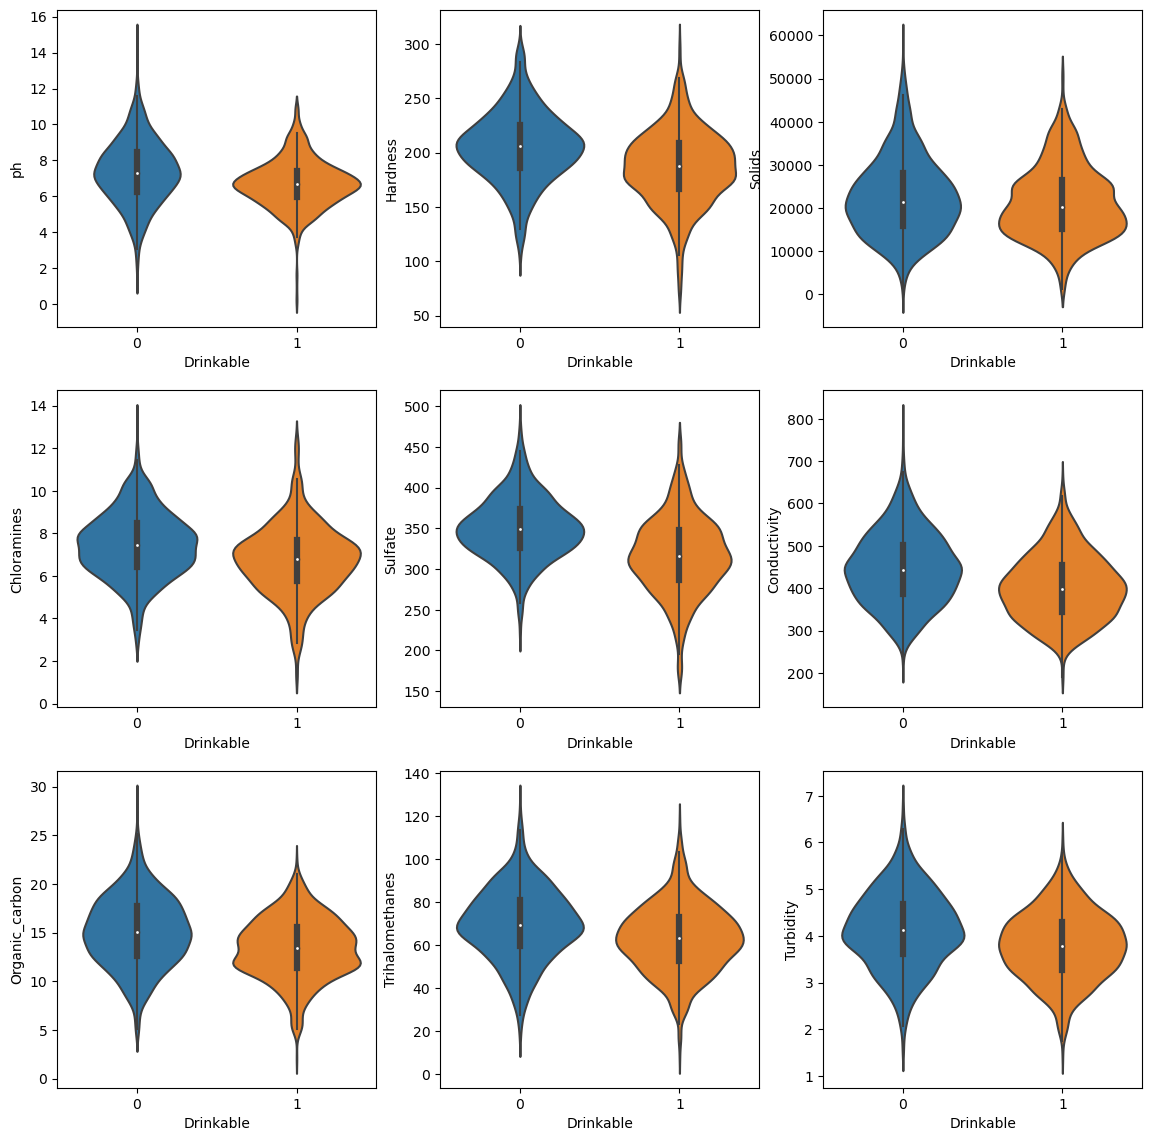

In [54]:
water_df = pd.read_csv("data/train.csv")
water_df = water_df.rename({"Unnamed: 0": "Index"}, axis=1)
water_df.head()
water_df = water_df.set_index("Index")
fig, axes = plt.subplots(3, 3, figsize=(14,14))
ax = axes.ravel()
for i, col in enumerate(water_df.columns[:9]):
    sns.violinplot(data=water_df, y=col, x='Drinkable', ax=ax[i])

From the violinplots we see that most of the columns seem to display approximately normal distribution. There doesn't seem to be many extreme outliers, but maybe ph and conductivity would be worth looking at for possible outliers. 

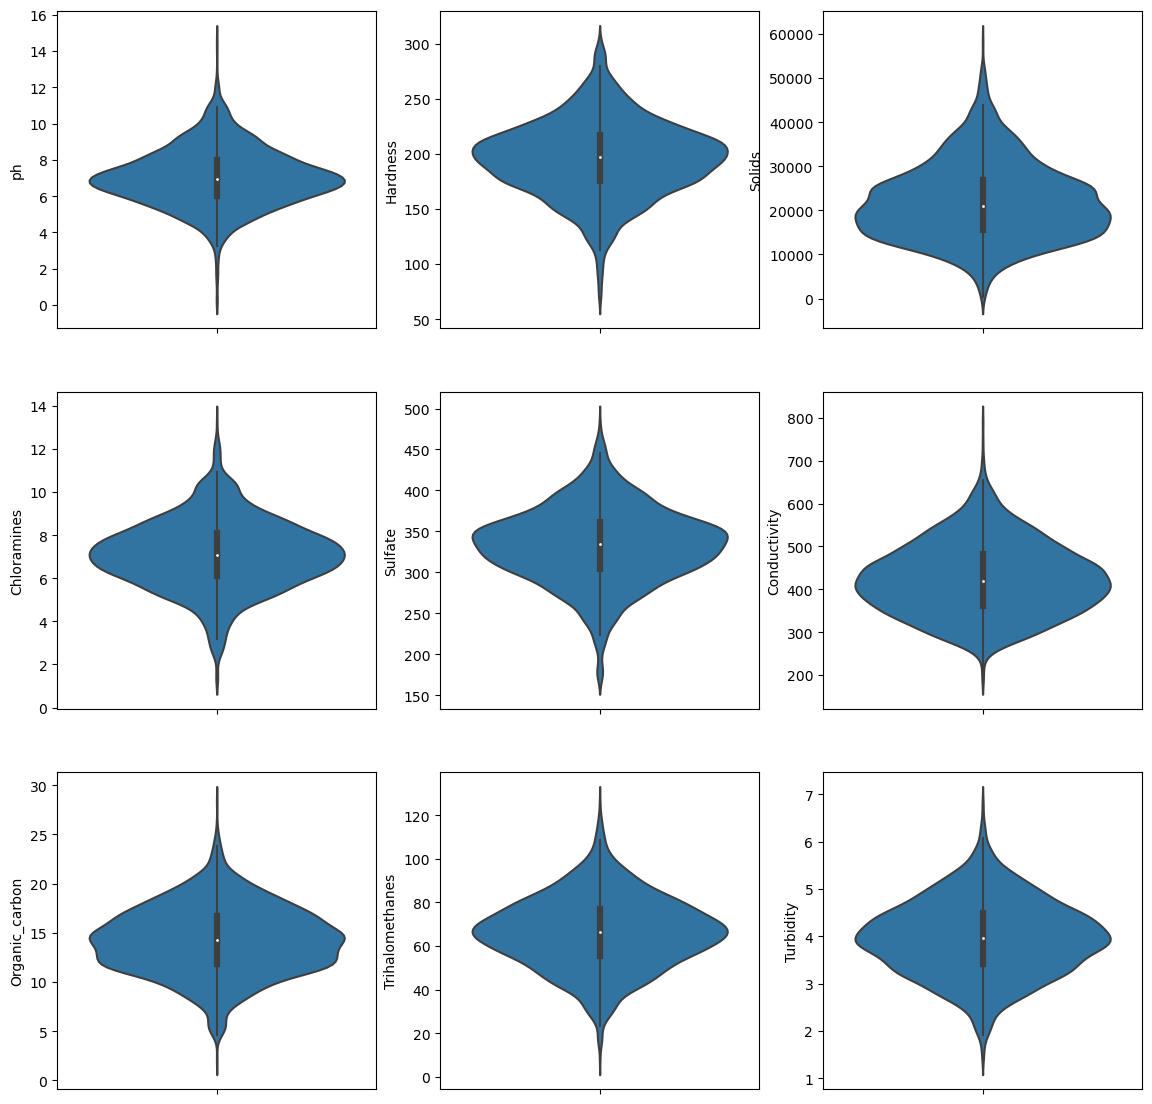

In [55]:
fig, axes = plt.subplots(3, 3, figsize=(14,14))
ax = axes.ravel()
for i, col in enumerate(train_df.columns[0:9]):
    sns.violinplot(data=water_df, y=col, ax=ax[i])

<Figure size 640x480 with 0 Axes>

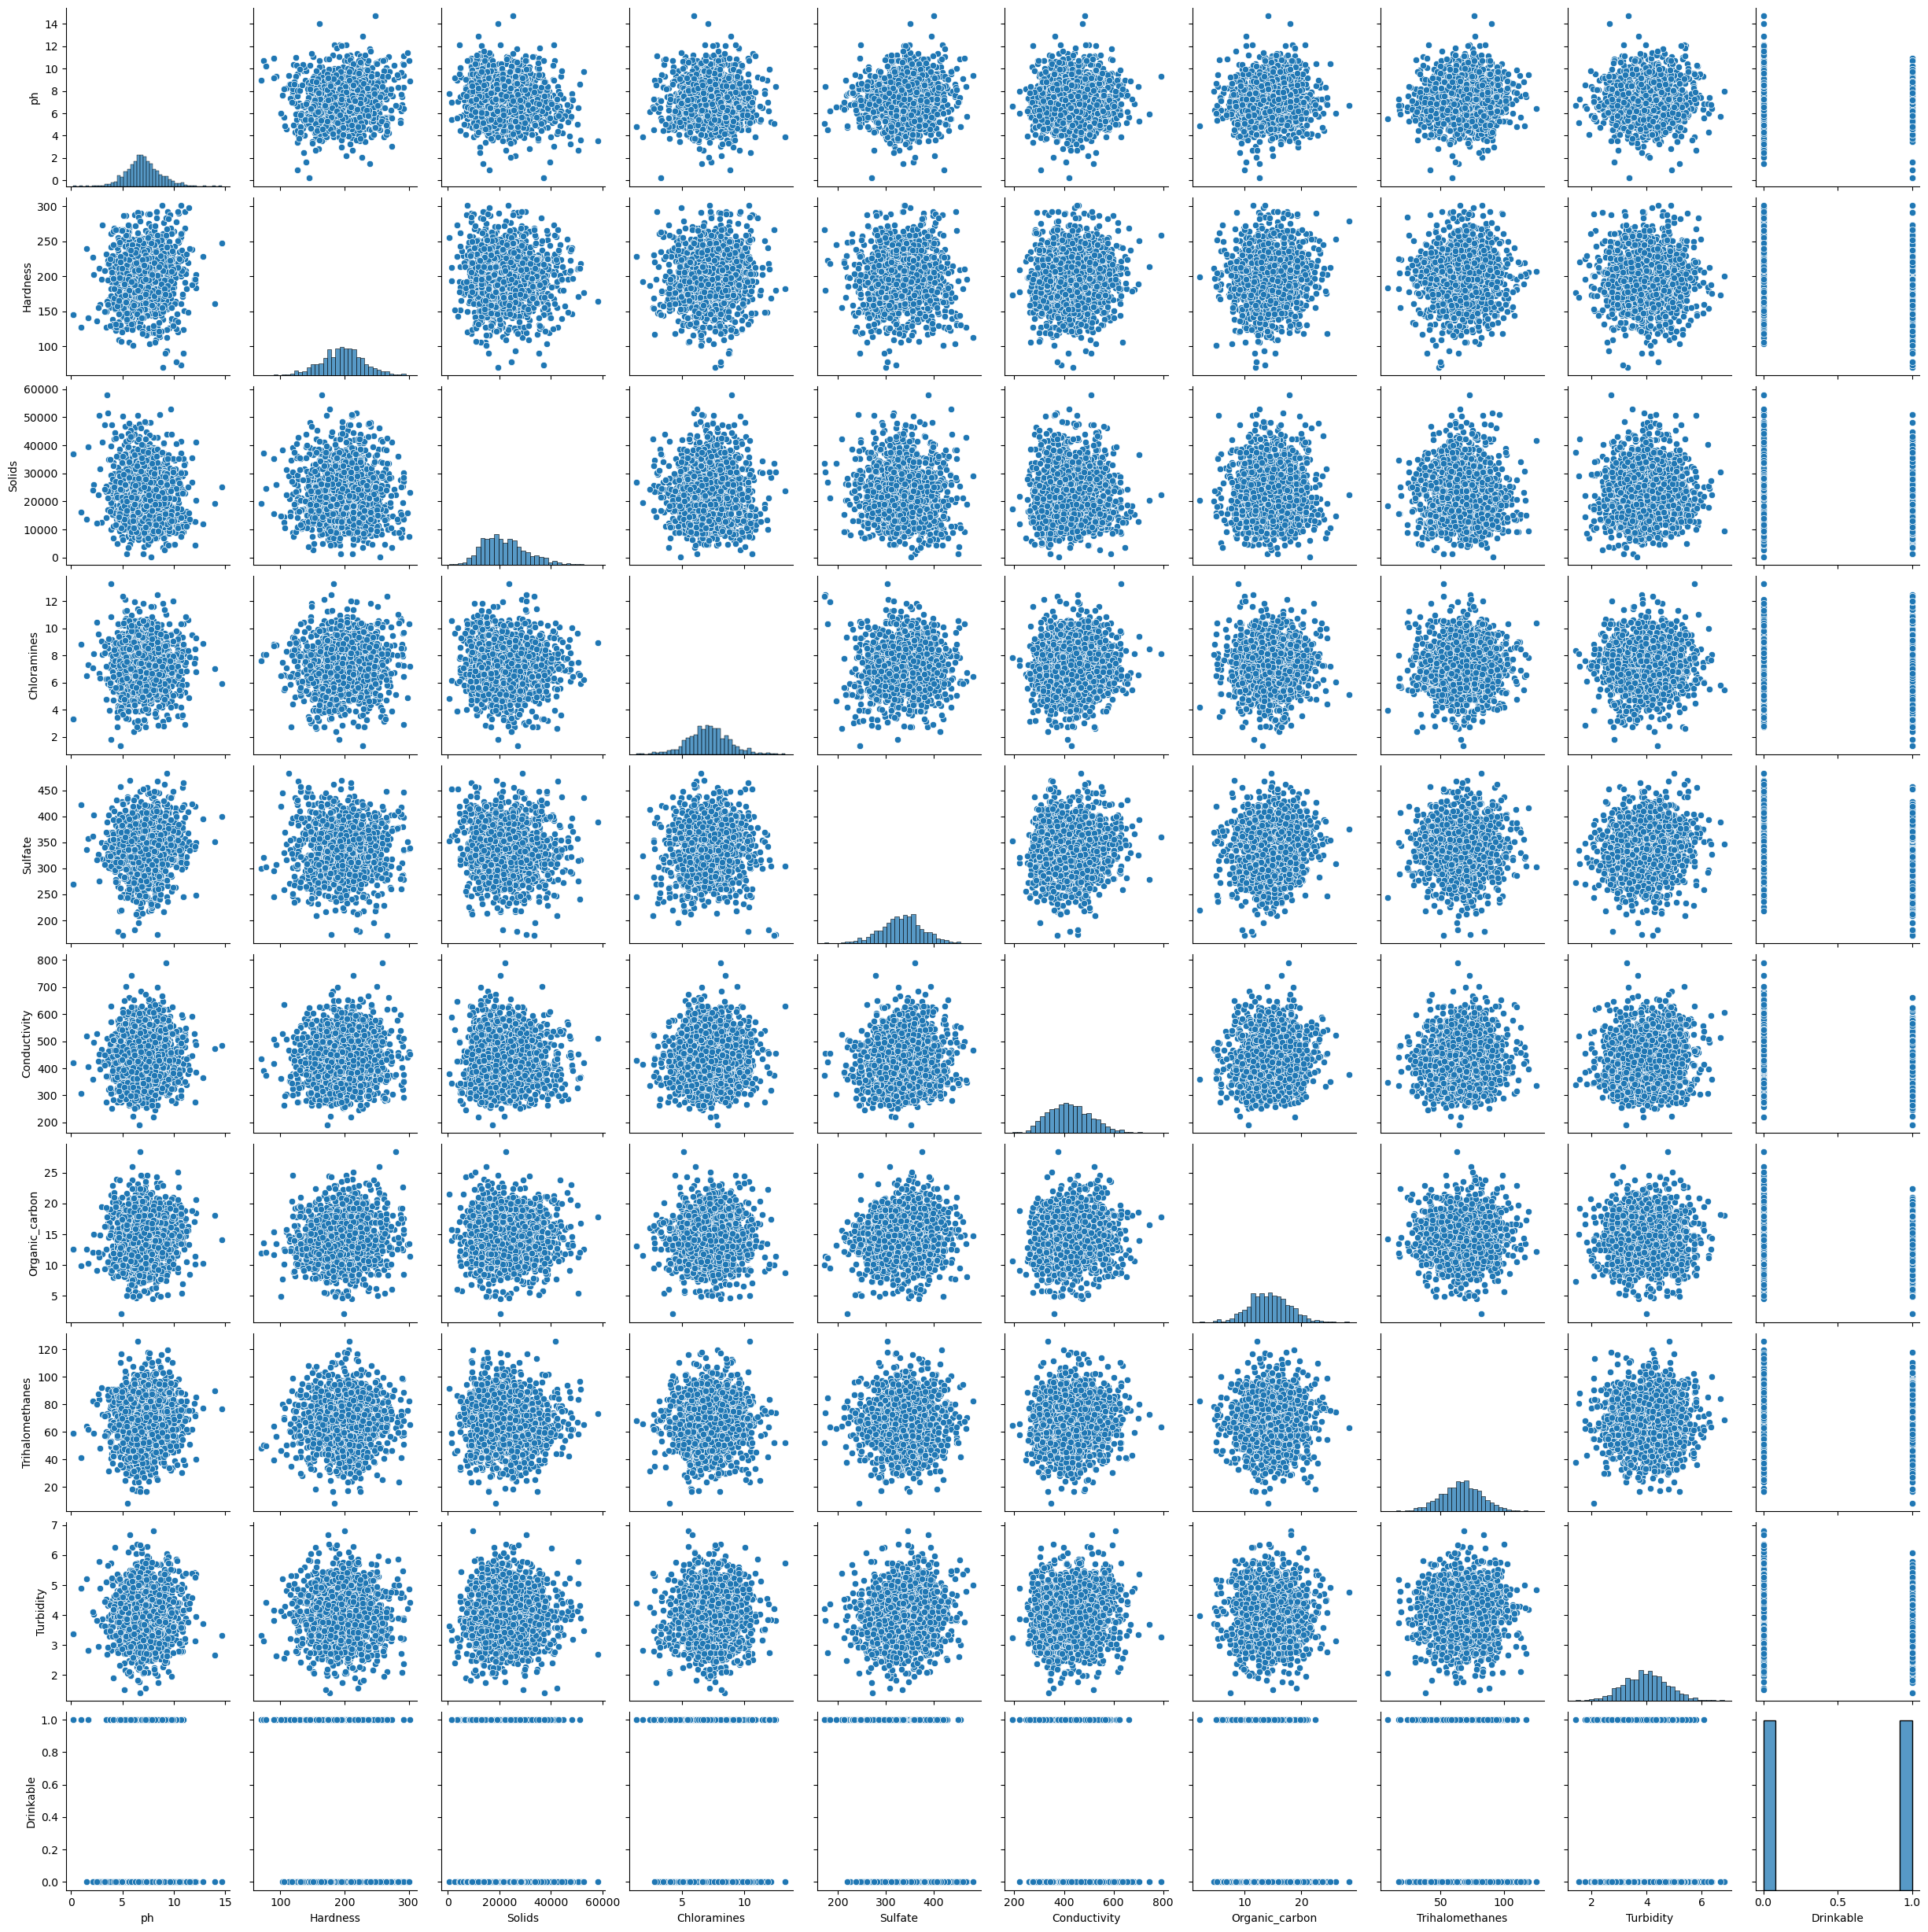

In [56]:
plt.figure()
sns.pairplot(water_df)

From the pairplot we see that none of the columns look particularly correlated with each other, as the dots seem pretty uniformly distributed in all the plots. 


### Preprocessing 

In [98]:
# Splitting into data matrix X and target y and then splitting into test and train data. 
# Based on code from lecture (Ch03_10_logReg_RS.py)
X = water_df.iloc[:, :9]
y = water_df['Drinkable']
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=1, stratify=y)

# Scaling 
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)


(612, 9)
(1428, 9)


### Model 1: Logistic Regression 

In [138]:
# Initialise the model
# Based on code from lecture (Ch03_10_logReg_RS.py)
acc_list = []
acc_list_train = []
for rs in range(1, 101):
    logR = LogisticRegression(C=1, 
                              random_state=rs,
                              solver='liblinear',
                              multi_class='auto')

    logR.fit(X_train_sc, y_train)



    #==============================================================================
    # Make predictions for test set
    #==============================================================================

    # Predict classes for samples in test set and print number of misclassfications
    y_pred = logR.predict(X_test_sc)
    acc_list.append(logR.score(X_test_sc, y_test))
    acc_list_train.append(logR.score(X_train_sc, y_train))
print(f'Logistic regression has an average accuracy of {np.mean(acc_list)} when C=1.')
print(np.mean(acc_list_train))

Logistic regression has an average accuracy of 0.8088235294117648 when C=1.
0.7913165266106442


Av. training accuracy for C=10**-8.0000 is 0.7878 +/- 0.000
Av. test accuracy for C=10**-8.0000 is 0.7990 +/- 0.000


Av. training accuracy for C=10**-7.0000 is 0.7878 +/- 0.000
Av. test accuracy for C=10**-7.0000 is 0.7990 +/- 0.000


Av. training accuracy for C=10**-6.0000 is 0.7878 +/- 0.000
Av. test accuracy for C=10**-6.0000 is 0.7990 +/- 0.000


Av. training accuracy for C=10**-5.0000 is 0.7885 +/- 0.000
Av. test accuracy for C=10**-5.0000 is 0.7990 +/- 0.000


Av. training accuracy for C=10**-4.0000 is 0.7892 +/- 0.000
Av. test accuracy for C=10**-4.0000 is 0.7941 +/- 0.000


Av. training accuracy for C=10**-3.0000 is 0.7913 +/- 0.000
Av. test accuracy for C=10**-3.0000 is 0.7990 +/- 0.000


Av. training accuracy for C=10**-2.0000 is 0.7920 +/- 0.000
Av. test accuracy for C=10**-2.0000 is 0.8056 +/- 0.000


Av. training accuracy for C=10**-1.0000 is 0.7906 +/- 0.000
Av. test accuracy for C=10**-1.0000 is 0.8088 +/- 0.000


Av. training accuracy for C=10**0.0000 is 0.7913 +/- 0.0

[Text(0, 0, '10**-8'),
 Text(1, 0, '10**-7'),
 Text(2, 0, '10**-6'),
 Text(3, 0, '10**-5'),
 Text(4, 0, '10**-4'),
 Text(5, 0, '10**-3'),
 Text(6, 0, '10**-2'),
 Text(7, 0, '10**-1'),
 Text(8, 0, '10**0'),
 Text(9, 0, '10**1'),
 Text(10, 0, '10**2'),
 Text(11, 0, '10**3'),
 Text(12, 0, '10**4'),
 Text(13, 0, '10**5'),
 Text(14, 0, '10**6'),
 Text(15, 0, '10**7'),
 Text(16, 0, '10**8'),
 Text(17, 0, '10**9'),
 Text(18, 0, '10**10')]

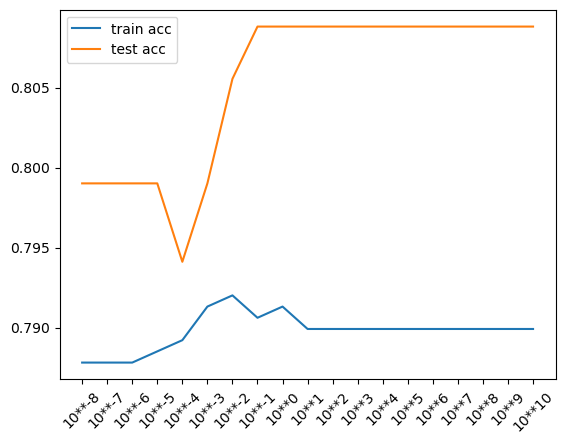

In [96]:
# Try to change parameter C in logistic regression to see what works best. 

# Initialise the model
# Based on code from lecture (Ch03_11_logReg_C_RS.py)
crange = np.arange(-8, 11)

allTrainAcc = []
allTestAcc = []
for c in crange:
    acc_train_list = []
    acc_test_list = []  
    for rs in range(1, 10):
  
        logR = LogisticRegression(C=10.**c, 
                                  random_state=rs,
                                  solver='liblinear',
                                  multi_class='auto')

        logR.fit(X_train_sc, y_train)



    #==============================================================================
    # Make predictions for test set
    #==============================================================================

    # Predict classes for samples in test set and print number of misclassfications

        acc_train_list.append(logR.score(X_train_sc, y_train))
        acc_test_list.append(logR.score(X_test_sc, y_test))
        
    # Compute average train accuracy and STD across all train test splits and
    # print out results
    accTrain_aver = np.mean(acc_train_list)
    accTrain_std = np.std(acc_train_list)
    print('Av. training accuracy for C=10**{0:.4f} is {1:.4f} +/- {2:.3f}'.format(c, accTrain_aver, accTrain_std))

    # Compute average test accuracy and STD across all train test splits and
    # print out results
    accTest_aver = np.mean(acc_test_list)
    accTest_std = np.std(acc_test_list)
    print('Av. test accuracy for C=10**{0:.4f} is {1:.4f} +/- {2:.3f}'.format(c, accTest_aver, accTest_std))
    print('\n')

    # Collect average accuracy for each C
    allTrainAcc.append(accTrain_aver)
    allTestAcc.append(accTest_aver)

# Construct pandas dataframe from lists with accuracies
accuracies = {'train acc':allTrainAcc, 'test acc':allTestAcc}
acc_df = pd.DataFrame(data=accuracies)
print(acc_df)
# Add column holding strings indicating value of C. Needed for xticks lables
acc_df['C'] = ['10**{0}'.format(c) for c in crange]

# Plot columns acc train and acc test. Define xticks lables
ax = acc_df.plot(xticks=acc_df.index, rot=45)
ax.set_xticklabels(acc_df.C)


19


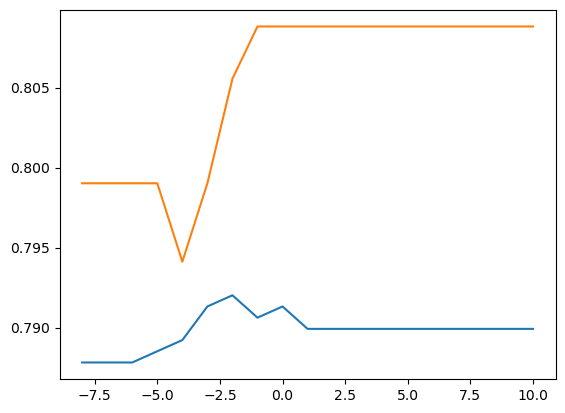

In [84]:
plt.figure()       
plt.plot(crange, acc_train_list)
plt.plot(crange, acc_test_list)
print(len(acc_train_list))

In [82]:
print(len(crange))

19


### Model 2: SVM 

Av. training accuracy for C=10**-8.0000 is 0.7955 +/- 0.000
Av. test accuracy for C=10**-8.0000 is 0.8088 +/- 0.000


Av. training accuracy for C=10**-7.0000 is 0.7955 +/- 0.000
Av. test accuracy for C=10**-7.0000 is 0.8088 +/- 0.000


Av. training accuracy for C=10**-6.0000 is 0.7955 +/- 0.000
Av. test accuracy for C=10**-6.0000 is 0.8088 +/- 0.000


Av. training accuracy for C=10**-5.0000 is 0.7955 +/- 0.000
Av. test accuracy for C=10**-5.0000 is 0.8088 +/- 0.000


Av. training accuracy for C=10**-4.0000 is 0.7955 +/- 0.000
Av. test accuracy for C=10**-4.0000 is 0.8088 +/- 0.000


Av. training accuracy for C=10**-3.0000 is 0.7955 +/- 0.000
Av. test accuracy for C=10**-3.0000 is 0.8088 +/- 0.000


Av. training accuracy for C=10**-2.0000 is 0.7955 +/- 0.000
Av. test accuracy for C=10**-2.0000 is 0.8088 +/- 0.000


Av. training accuracy for C=10**-1.0000 is 0.7955 +/- 0.000
Av. test accuracy for C=10**-1.0000 is 0.8088 +/- 0.000


Av. training accuracy for C=10**0.0000 is 0.7955 +/- 0.0

[Text(0, 0, '10**-8'),
 Text(1, 0, '10**-7'),
 Text(2, 0, '10**-6'),
 Text(3, 0, '10**-5'),
 Text(4, 0, '10**-4'),
 Text(5, 0, '10**-3'),
 Text(6, 0, '10**-2'),
 Text(7, 0, '10**-1'),
 Text(8, 0, '10**0'),
 Text(9, 0, '10**1'),
 Text(10, 0, '10**2'),
 Text(11, 0, '10**3'),
 Text(12, 0, '10**4'),
 Text(13, 0, '10**5'),
 Text(14, 0, '10**6'),
 Text(15, 0, '10**7'),
 Text(16, 0, '10**8'),
 Text(17, 0, '10**9'),
 Text(18, 0, '10**10')]

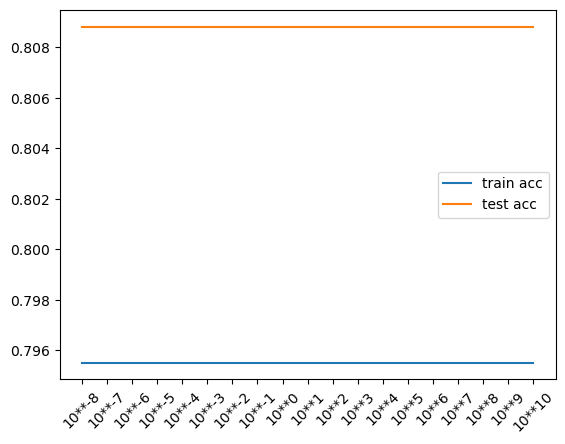

In [106]:
# Linear SVM 
crange = np.arange(-8, 11)

allTrainAcc = []
allTestAcc = []
for c in crange:
    acc_train_list = []
    acc_test_list = []  
    for rs in range(1, 10):
        svm = SVC(kernel='linear', C=1.0, random_state=1)
        svm.fit(X_train_sc, y_train)
        svm.score(X_test_sc, y_test)
    
        acc_train_list.append(svm.score(X_train_sc, y_train))
        acc_test_list.append(svm.score(X_test_sc, y_test))
        
    # Compute average train accuracy and STD across all train test splits and
    # print out results
    accTrain_aver = np.mean(acc_train_list)
    accTrain_std = np.std(acc_train_list)
    print('Av. training accuracy for C=10**{0:.4f} is {1:.4f} +/- {2:.3f}'.format(c, accTrain_aver, accTrain_std))

    # Compute average test accuracy and STD across all train test splits and
    # print out results
    accTest_aver = np.mean(acc_test_list)
    accTest_std = np.std(acc_test_list)
    print('Av. test accuracy for C=10**{0:.4f} is {1:.4f} +/- {2:.3f}'.format(c, accTest_aver, accTest_std))
    print('\n')

    # Collect average accuracy for each C
    allTrainAcc.append(accTrain_aver)
    allTestAcc.append(accTest_aver)

# Construct pandas dataframe from lists with accuracies
accuracies = {'train acc':allTrainAcc, 'test acc':allTestAcc}
acc_df = pd.DataFrame(data=accuracies)
print(acc_df)
# Add column holding strings indicating value of C. Needed for xticks lables
acc_df['C'] = ['10**{0}'.format(c) for c in crange]

# Plot columns acc train and acc test. Define xticks lables
ax = acc_df.plot(xticks=acc_df.index, rot=45)
ax.set_xticklabels(acc_df.C)


In [120]:
svm = SVC(kernel='linear', C=1, random_state=1)
svm.fit(X_train_sc, y_train)
svm.score(X_test_sc, y_test)
# Linear SVM seems to perform similarly to logistic regression. As SVM is a more complex model, with higher computational cost,
# linear SVM is not preferred in this situation. 

0.8088235294117647

In [119]:
for c in range(-8, 11):
    svm = SVC(kernel='rbf', C=10.**c, random_state=1)
    svm.fit(X_train_sc, y_train)
    print(f'10**{c} : {svm.score(X_test_sc, y_test)}')
    

10**-8 : 0.8169934640522876
10**-7 : 0.8169934640522876
10**-6 : 0.8169934640522876
10**-5 : 0.8169934640522876
10**-4 : 0.8169934640522876
10**-3 : 0.8169934640522876
10**-2 : 0.8120915032679739
10**-1 : 0.8235294117647058
10**0 : 0.8316993464052288
10**1 : 0.8578431372549019
10**2 : 0.8464052287581699
10**3 : 0.8251633986928104
10**4 : 0.826797385620915
10**5 : 0.826797385620915
10**6 : 0.826797385620915
10**7 : 0.826797385620915
10**8 : 0.826797385620915
10**9 : 0.826797385620915
10**10 : 0.826797385620915


RBF SVM seems to improve prediction accuracy with around 3 % from linear SVM and logistic regression. 

### Model 3: Decision tree

In [127]:
tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4, 
                              random_state=1)
tree.fit(X_train, y_train)



#==============================================================================
# Plot decision region with training and test data
#==============================================================================
"""
# Stack training and test data for plotting of decision regions
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

# Plot decision region
plot_decision_regions(X=X_combined, 
                      y=y_combined,
                      clf=tree, 
                      X_highlight=X_test)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_20.png', dpi=300)
plt.show()

"""

# =============================================================================
# Print out accuracies for train and test
# =============================================================================

# Print accuracy computed from predictions on the test set
print('Training data accuracy: {0:.2f}'.format(tree.score(X_train, y_train)))

# Print accuracy computed from predictions on the test set
print('Test data accuracy: {0:.2f}'.format(tree.score(X_test, y_test)))



Training data accuracy: 0.79
Test data accuracy: 0.75


In [134]:
for t in range(1, 100):
    tree = DecisionTreeClassifier(criterion='gini', 
                                  max_depth=t, 
                                  random_state=1)
    tree.fit(X_train, y_train)



    # =============================================================================
    # Print out accuracies for train and test
    # =============================================================================

    # Print accuracy computed from predictions on the test set
    print('Training data with tree depth {0} accuracy: {1:.2f}'.format(t, tree.score(X_train, y_train)))

    # Print accuracy computed from predictions on the test set
    print('Test data with tree depth {0} accuracy: {1:.2f}'.format(t, tree.score(X_test, y_test)))



Training data with tree depth 1 accuracy: 0.67
Test data with tree depth 1 accuracy: 0.65
Training data with tree depth 2 accuracy: 0.68
Test data with tree depth 2 accuracy: 0.68
Training data with tree depth 3 accuracy: 0.76
Test data with tree depth 3 accuracy: 0.72
Training data with tree depth 4 accuracy: 0.79
Test data with tree depth 4 accuracy: 0.75
Training data with tree depth 5 accuracy: 0.85
Test data with tree depth 5 accuracy: 0.79
Training data with tree depth 6 accuracy: 0.88
Test data with tree depth 6 accuracy: 0.81
Training data with tree depth 7 accuracy: 0.90
Test data with tree depth 7 accuracy: 0.80
Training data with tree depth 8 accuracy: 0.93
Test data with tree depth 8 accuracy: 0.82
Training data with tree depth 9 accuracy: 0.95
Test data with tree depth 9 accuracy: 0.81
Training data with tree depth 10 accuracy: 0.97
Test data with tree depth 10 accuracy: 0.83
Training data with tree depth 11 accuracy: 0.98
Test data with tree depth 11 accuracy: 0.81
Traini

Decision tree seems to perform better than logisitic regression and linear SVM but only 1 % better than RBF SVM. We also need to reach a depth of 16 before we outperform RBF SVM. 